# Assignment 2

- Name: **GOURAV KUMAR SHAW**
- Roll: **2020CSBO1O**

## (i) Download data

Data downloaded.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_PATH = '/content/drive/MyDrive/ML_DRIVE/Assign_2'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.naive_bayes import BernoulliNB
from random import randint
from statistics import mean
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv(f"{BASE_PATH}/data.csv")
print("Dataset shape:", dataset.shape)
print("Dataset columns:", dataset.columns)

Dataset shape: (569, 33)
Dataset columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
dataset = dataset.drop(columns = ['id', 'Unnamed: 32'])
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## (ii) Implement Logistic regression
Implement Logistic regression using scikit-learn package in python after splitting the dataset 80:10:10 percent (use seed = 5 for splitting).

In [ ]:
def train_validate_test_split(df, train_percent=.8, validate_percent=.1, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [ ]:
train_df, validation_df, test_df = train_validate_test_split(dataset, train_percent=0.8, validate_percent=0.1, seed=5)
print("Shape of train:", train_df.shape)
print("Shape of validation:", validation_df.shape)
print("Shape of test:", test_df.shape)

Shape of train: (455, 31)
Shape of validation: (56, 31)
Shape of test: (58, 31)


In [ ]:
train_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
28,M,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,...,20.27,36.71,149.30,1269.0,0.16410,0.61100,0.63350,0.20240,0.4027,0.09876
163,B,12.340,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,...,13.58,28.68,87.36,553.0,0.14520,0.23380,0.16880,0.08194,0.2268,0.09082
123,B,14.500,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,...,15.70,15.98,102.80,745.5,0.13130,0.17880,0.25600,0.12210,0.2889,0.08006
361,B,13.300,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,...,14.20,29.20,92.94,621.2,0.11400,0.16670,0.12120,0.05614,0.2637,0.06658
549,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,...,13.03,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,B,10.600,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.12130,0.25150,0.19160,0.07926,0.2940,0.07587
470,B,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,...,11.14,25.62,70.88,385.2,0.12340,0.15420,0.12770,0.06560,0.3174,0.08524
473,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743
169,B,14.970,16.95,96.22,685.9,0.09855,0.07885,0.02602,0.03781,0.1780,...,16.11,23.00,104.60,793.7,0.12160,0.16370,0.06648,0.08485,0.2404,0.06428


In [ ]:
validation_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
243,B,13.750,23.77,88.54,590.0,0.08043,0.06807,0.046970,0.023440,0.1773,...,15.010,26.34,98.00,706.0,0.09368,0.14420,0.135900,0.06106,0.2663,0.06321
82,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,0.1829,...,30.000,33.62,211.70,2562.0,0.15730,0.60760,0.647600,0.28670,0.2355,0.10510
260,M,20.310,27.06,132.90,1288.0,0.10000,0.10880,0.151900,0.093330,0.1814,...,24.330,39.16,162.30,1844.0,0.15220,0.29450,0.378800,0.16970,0.3151,0.07999
433,M,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.159400,0.087440,0.1943,...,22.660,30.93,145.30,1603.0,0.13900,0.34630,0.391200,0.17080,0.3007,0.08314
348,B,11.470,16.03,73.02,402.7,0.09076,0.05886,0.025870,0.023220,0.1634,...,12.510,20.79,79.67,475.8,0.15310,0.11200,0.098230,0.06548,0.2851,0.08763
372,M,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,...,22.690,21.84,152.10,1535.0,0.11920,0.28400,0.402400,0.19660,0.2730,0.08666
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.000000,0.000000,0.2163,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.000000,0.00000,0.3142,0.08116
22,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.097560,0.2521,...,18.070,19.08,125.10,980.9,0.13900,0.59540,0.630500,0.23930,0.4667,0.09946
337,M,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.106000,0.060900,0.1953,...,24.540,34.37,161.10,1873.0,0.14980,0.48270,0.463400,0.20480,0.3679,0.09870
308,B,13.500,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,0.1365,...,14.970,16.94,95.48,698.7,0.09023,0.05836,0.013790,0.02210,0.2267,0.06192


In [ ]:
test_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
32,M,17.020,23.98,112.80,899.3,0.11970,0.14960,0.24170,0.120300,0.2248,...,20.880,32.09,136.10,1344.0,0.16340,0.35590,0.55880,0.18470,0.3530,0.08482
31,M,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.051820,0.2301,...,16.820,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
235,B,14.030,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.018960,0.1517,...,15.330,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617
374,B,13.690,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.020310,0.1872,...,14.840,20.21,99.16,670.6,0.11050,0.20960,0.13460,0.06987,0.3323,0.07701
397,B,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.040830,0.1574,...,13.740,21.06,90.72,591.0,0.09534,0.18120,0.19010,0.08296,0.1988,0.07053
408,M,17.990,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.088240,0.1992,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
418,B,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.024020,0.1583,...,13.650,16.92,88.12,566.9,0.13140,0.16070,0.09385,0.08224,0.2775,0.09464
389,M,19.550,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.102100,0.1989,...,20.820,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
552,B,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.014990,0.1539,...,13.870,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484
265,M,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.086460,0.1769,...,32.490,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218


In [ ]:
y_test, y_train, y_valid = test_df['diagnosis'], train_df['diagnosis'], validation_df['diagnosis']
X_test, X_train, X_valid = test_df.drop('diagnosis', axis=1), train_df.drop('diagnosis', axis=1), validation_df.drop('diagnosis', axis=1)

## (iii) Train Logistic Regression Model

In [ ]:
def train_model_with_solver(X_train, y_train, X_valid, y_valid, solver, penalty='l2', C=1.0):
  lr = LogisticRegression(solver = solver, max_iter = 10000, penalty=penalty, C=C)
  lr.fit(X_train, y_train)
  score = lr.score(X_valid, y_valid)

  return {
      "solver": solver,
      "score": score,
      "coefs": lr.coef_.tolist()[0],
      "penalty": penalty,
      "inv_of_regularization": C
  }


In [ ]:
def display_table(models, columns):
  headers = ['solver', 'accuracy', 'penalty', 'inv_of_regularization'] + columns.tolist()
  data = [[model['solver'], model['score'], model["penalty"], model["inv_of_regularization"]] + model['coefs'] for model in models]

  return pd.DataFrame(
      columns = headers,
      data = data
  )

In [ ]:
newton_cg_model = train_model_with_solver(X_train, y_train, X_valid, y_valid, "newton-cg")
lbfgs_model = train_model_with_solver(X_train, y_train, X_valid, y_valid, "lbfgs")
liblinear_model = train_model_with_solver(X_train, y_train, X_valid, y_valid, "liblinear")

In [ ]:
display_table([newton_cg_model, lbfgs_model, liblinear_model], X_train.columns)

,solver,accuracy,penalty,inv_of_regularization,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,newton-cg,0.964286,l2,1.0,-0.482746,-0.114460,0.151515,-0.019250,0.141869,0.180147,...,0.102382,0.365786,0.133497,0.010516,0.282649,0.681491,1.109169,0.518651,0.440800,0.071889
1,lbfgs,0.964286,l2,1.0,-0.462414,-0.116836,0.148923,-0.019297,0.139558,0.174292,...,0.082900,0.367557,0.133069,0.010742,0.278452,0.667020,1.096524,0.510148,0.429977,0.070132
2,liblinear,0.946429,l2,1.0,-1.653319,-0.091261,-0.029303,0.005608,0.117744,0.353893,...,-1.304164,0.290656,0.142946,0.024092,0.217746,1.057967,1.319708,0.520678,0.403195,0.102356


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['radius_mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['texture_mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['perimeter_mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['radius_mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['texture_mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['perimeter_mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['solver'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['accuracy', 'radius_mean'], ['radius_mean', 'texture_mean'], ['texture_mean', 'perimeter_mean'], ['perimeter_mean', 'area_mean']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['accuracy', 'solver'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_11, *['radius_mean', 'solver'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['texture_mean', 'solver'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['perimeter_mean', 'solver'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_14, *['inv_of_regularization', 'accuracy', 'solver'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_15, *['inv_of_regularization', 'radius_mean', 'solver'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_16, *['inv_of_regularization', 'texture_mean', 'solver'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['inv_of_regularization', 'perimeter_mean', 'solver'], **{})
chart

## (iv) Use ‘l1’, ‘l2’, ‘none’ penality to train the Logistic regression model.

In [ ]:
l1_model = train_model_with_solver(X_train, y_train, X_valid, y_valid, "saga", penalty="l1")
l2_model = train_model_with_solver(X_train, y_train, X_valid, y_valid, "saga", penalty="l2")
none_model = train_model_with_solver(X_train, y_train, X_valid, y_valid, "saga", penalty="none")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
display_table([l1_model, l2_model, none_model], X_train.columns)

,solver,accuracy,penalty,inv_of_regularization,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,saga,0.910714,l1,1.0,-0.014208,-0.009116,-0.076412,-0.014943,0.000000,0.000048,...,-0.014996,-0.010516,-0.068384,0.028821,0.000000,0.000788,0.001220,0.000131,0.000000,0.000000
1,saga,0.910714,l2,1.0,-0.014422,-0.009283,-0.076457,-0.014982,-0.000094,0.000268,...,-0.015211,-0.010662,-0.068438,0.028876,-0.000092,0.001023,0.001467,0.000377,-0.000216,-0.000022
2,saga,0.910714,none,1.0,-0.014426,-0.009281,-0.076474,-0.014982,-0.000094,0.000268,...,-0.015215,-0.010659,-0.068444,0.028878,-0.000092,0.001023,0.001468,0.000377,-0.000217,-0.000022


## (v) Vary the l1 penalty over the range (0.1, 0.25, 0.75, 0.9)
compare the coefficients of the features.

In [28]:
penalties = [1e-6,0.1, 0.25, 0.75, 0.9]
models = [train_model_with_solver(X_train, y_train, X_valid, y_valid, "saga", penalty="l1", C=p) for p in penalties]
display_table(models, X_train.columns)

,solver,accuracy,penalty,inv_of_regularization,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,saga,0.607143,l1,0.000001,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,saga,0.875000,l1,0.100000,-0.011833,-0.008297,-0.072560,-0.018123,0.0,0.000000e+00,...,-0.012468,-0.007842,-0.066269,0.031088,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,saga,0.875000,l1,0.250000,-0.013080,-0.009254,-0.072904,-0.018392,0.0,0.000000e+00,...,-0.013721,-0.008632,-0.066642,0.031454,0.0,0.000119,0.000504,0.000000,0.0,0.0
3,saga,0.875000,l1,0.750000,-0.013637,-0.009683,-0.073070,-0.018512,0.0,4.344609e-07,...,-0.014282,-0.008987,-0.066811,0.031619,0.0,0.000703,0.001138,0.000056,0.0,0.0
4,saga,0.875000,l1,0.900000,-0.013684,-0.009712,-0.073085,-0.018523,0.0,3.084505e-05,...,-0.014329,-0.009018,-0.066832,0.031634,0.0,0.000755,0.001191,0.000107,0.0,0.0


## (vi) Estimate the average accuracy of the Naive Bayes algorithm using 5-fold cross-validation
Use scikit-learn package in python. Plot the bar graph using matplotlib.

In [25]:
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']
folds = KFold(n_splits=5, shuffle=True)
nb_accuracy = []
for train_ids, test_ids in folds.split(X):
  X_train = X.iloc[train_ids]
  y_train = y.iloc[train_ids]
  X_test = X.iloc[test_ids]
  y_test = y.iloc[test_ids]

  naive_bayes_model = BernoulliNB()
  naive_bayes_model.fit(X_train, y_train)

  accuracy = naive_bayes_model.score(X_test, y_test)
  nb_accuracy.append(accuracy)

print("Avg accuracy = ", mean(nb_accuracy))

Avg accuracy =  0.6273870517000465


[]

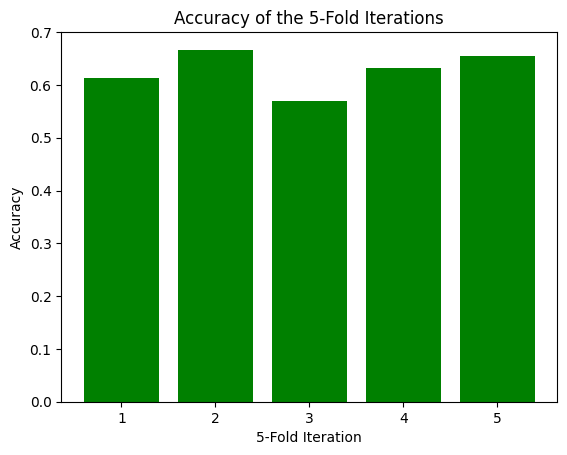

In [ ]:
plt.xlabel('5-Fold Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy of the 5-Fold Iterations')
plt.bar([x for x in range(1,6)],nb_accuracy, color='green')
plt.plot()